In [1]:
import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_folder = "/u/scratch/z/zhengton/CS263/output/"

In [27]:
model_to_name = {'bert': "BERT", 'bigbird': 'BigBird', 'longformer': 'LongFormer'}

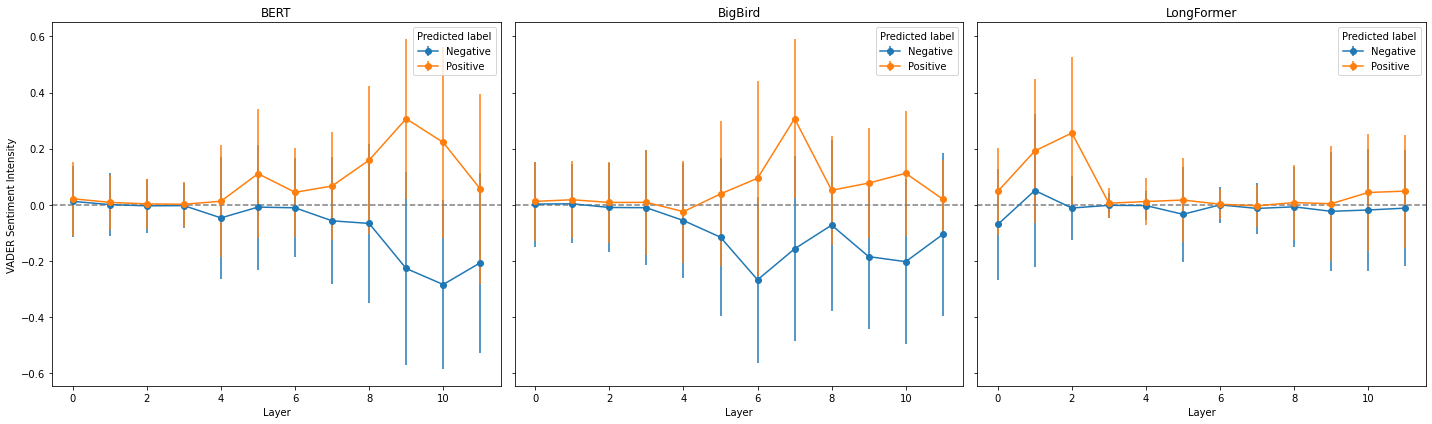

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for k, (model, name) in enumerate(model_to_name.items()):
    plt.sca(ax[k])
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)

    negative_examples = []
    positive_examples = []
    for result in results:
        predicted = result['prediction'].argmax().item()
        if predicted == 1:
            positive_examples.append(result['max_token_sentiment_scores'])
        else:
            negative_examples.append(result['max_token_sentiment_scores'])
    
    plt.errorbar(np.arange(12), y=np.array(negative_examples).mean(axis=0),
                yerr=np.array(negative_examples).std(axis=0), fmt='o-', label='Negative')
    plt.errorbar(np.arange(12), y=np.array(positive_examples).mean(axis=0),
                yerr=np.array(positive_examples).std(axis=0), fmt='o-', label='Positive')
    plt.axhline(0, linestyle='--', color='gray')
    plt.legend(title='Predicted label')
    plt.xlabel('Layer')
    if k == 0:
        plt.ylabel('VADER Sentiment Intensity')
    plt.title(f'{name}')
plt.tight_layout()
plt.savefig(f'{data_folder}/imdb_sentiment_scores.png', bbox_inches='tight', dpi=300, facecolor='white')

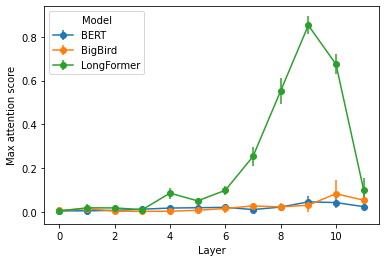

In [41]:
for model, name in model_to_name.items():
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)
        
    att_scores = []
    for result in results:
        att_score = result['max_tokens_attention_scores']
        att_scores.append(att_score)
    att_scores = np.array(att_scores)
    plt.errorbar(np.arange(12), y=att_scores.mean(axis=0), yerr=att_scores.std(axis=0), fmt='o-', label=name)
plt.xlabel('Layer')
plt.ylabel('Max attention score')
plt.legend(title='Model')
plt.savefig(f'{data_folder}/imdb_attention_scores.png', bbox_inches='tight', dpi=300, facecolor='white')

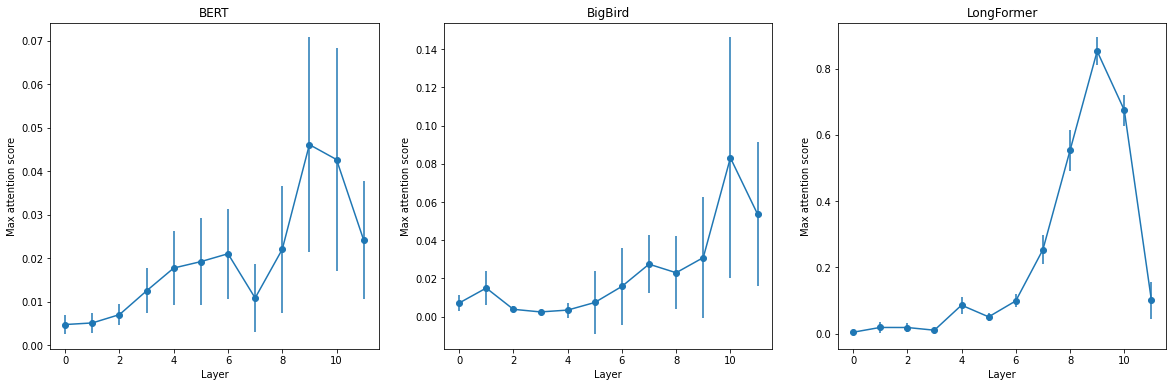

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for k, (model, name) in enumerate(model_to_name.items()):
    plt.sca(ax[k])
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)
        
    att_scores = []
    for result in results:
        att_score = result['max_tokens_attention_scores']
        att_scores.append(att_score)
    att_scores = np.array(att_scores)
    plt.errorbar(np.arange(12), y=att_scores.mean(axis=0), yerr=att_scores.std(axis=0), fmt='o-')
    plt.title(name)
    plt.xlabel('Layer')
    plt.ylabel('Max attention score')
plt.savefig(f'{data_folder}/imdb_attention_scores_separate.png', bbox_inches='tight', dpi=300, facecolor='white')